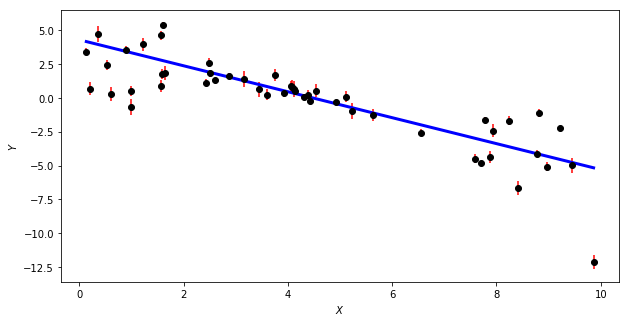

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# truth
m_true = -0.9594  # slope
b_true = 4.294  # intercept
f_true = 0.534  # fractional scaling

# generate mock data
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y_true = m_true * x + b_true
y = y_true + np.abs(f_true * y_true) * np.random.randn(N)
y += yerr * np.random.randn(N)

# plot results
plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr=yerr, fmt='ko', ecolor='red')
plt.plot(x, y_true, color='blue', lw=3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.show()

In [3]:
# log-likelihood (diffrence between observed data and points)
def loglike(theta):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0 / (yerr**2 + model**2 * np.exp(2 * lnf))

    return -0.5 * (np.sum((y-model)**2 * inv_sigma2 - np.log(inv_sigma2)))

# prior transform (interval)
def prior_transform(utheta):
    um, ub, ulf = utheta
    m = 5.5 * um - 5.
    b = 10. * ub
    lnf = 11. * ulf - 10.

    return m, b, lnf

In [4]:
import dynesty

dsampler = dynesty.DynamicNestedSampler(loglike, prior_transform, ndim=3,
                                        bound='multi', sample='rwalk',
                                        update_interval=3.)
dsampler.run_nested()
dres = dsampler.results

iter: 20712 | batch: 9 | bound: 245 | nc: 25 | ncall: 478139 | eff(%):  4.332 | loglstar: -35.681 < -29.088 < -29.783 | logz: -39.663 +/-  0.130 | stop:  0.930                      


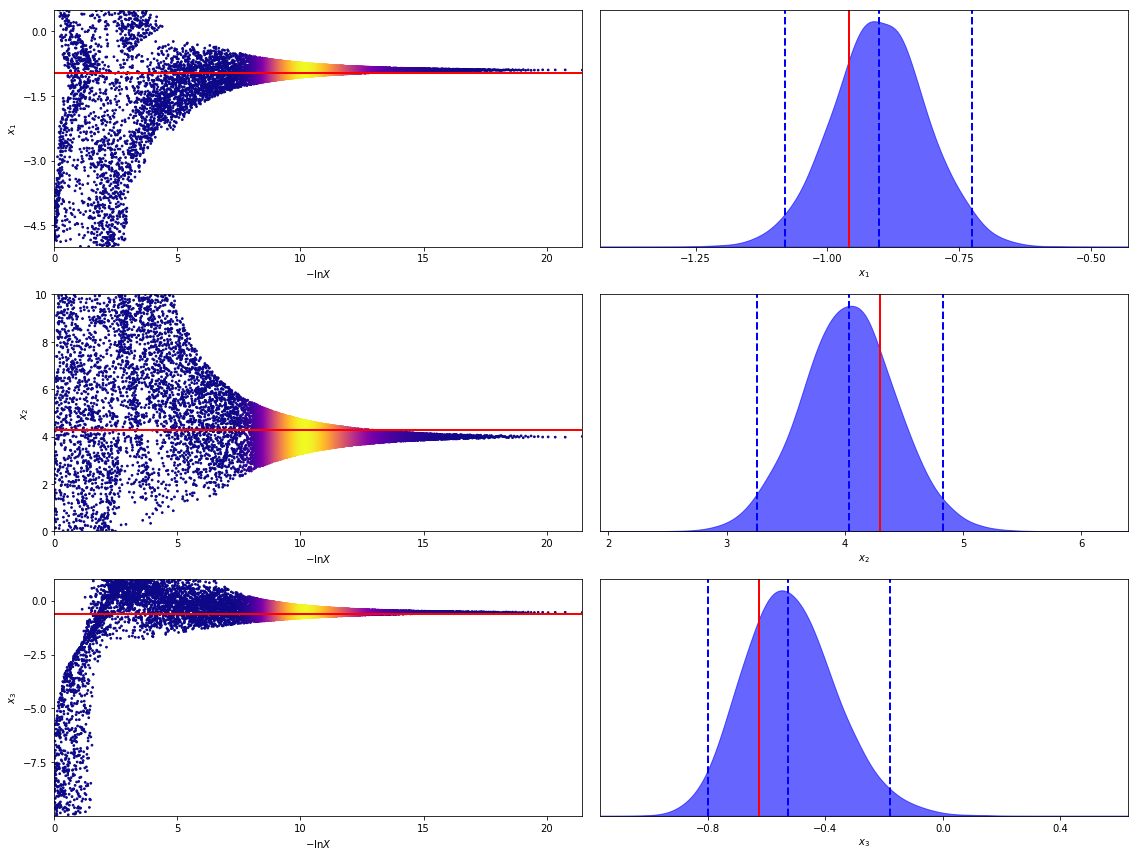

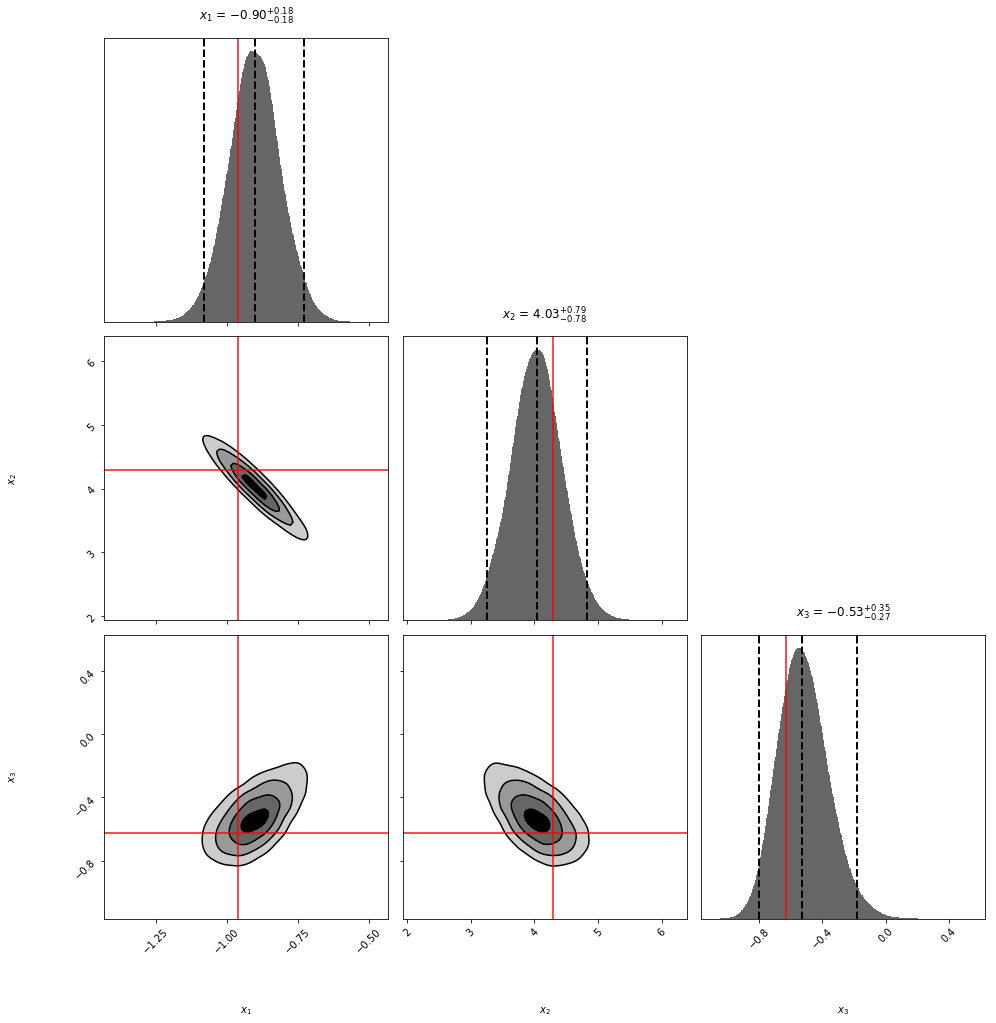

In [5]:
from dynesty import plotting as dyplot

truths = [m_true, b_true, np.log(f_true)]

# trace plot
fig, axes = dyplot.traceplot(dsampler.results, truths=truths,
                             fig=plt.subplots(3, 2, figsize=(16, 12)))
fig.tight_layout()

# corner plot
fig, axes = dyplot.cornerplot(dres, truths=truths, show_titles=True,
                              title_kwargs={'y': 1.04},
                              fig=plt.subplots(3, 3, figsize=(15, 15)))
plt.show ()